# **1. Import Libraries and Load Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, GRU, LSTM, Bidirectional, SimpleRNN
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

#download file from drive using link
!gdown 1zHjF3BIi7Cjv5LuO-LRtxTMx_6fo5b10 -O Phishing_Email.csv
# Load dataset
df = pd.read_csv("/content/Phishing_Email.csv")


Downloading...
From: https://drive.google.com/uc?id=1zHjF3BIi7Cjv5LuO-LRtxTMx_6fo5b10
To: /content/Phishing_Email.csv
100% 52.0M/52.0M [00:00<00:00, 64.5MB/s]


# **2. EDA**


In [ ]:
df.head()
df.isnull().sum()

,0
Unnamed: 0,0
Email Text,16
Email Type,0


### Data Cleaning

In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.dropna(inplace=True, axis=0)
df.drop_duplicates(inplace=True)

df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


### Visualize Categorical Distribution


In [ ]:
# Bar Chart
fig = px.bar(df['Email Type'].value_counts(),
             x=df['Email Type'].value_counts().index,
             y=df['Email Type'].value_counts().values,
             color=['blue', 'red'],
             labels={'x': 'Category', 'y': 'Count'},
             title="Categorical Distribution")
fig.show()

# Pie Chart
fig_pie = px.pie(df['Email Type'].value_counts(),
                 names=df['Email Type'].value_counts().index,
                 values=df['Email Type'].value_counts().values,
                 title="Categorical Distribution")
fig_pie.show()


# **3. Text Preprocessing**

In [ ]:
import re

le = LabelEncoder()
df["Email Type"] = le.fit_transform(df["Email Type"])
df.head()


def preprocess_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["Email Text"] = df["Email Text"].apply(preprocess_text)
df.head()

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


### TF-IDF Vectorization


In [ ]:
tf = TfidfVectorizer(stop_words="english", max_features=10000) # dimension reduction
feature_x = tf.fit_transform(df["Email Text"]).toarray()
y_tf = np.array(df['Email Type'])  # Convert the label into numpy array

# **4. The Model**

### Split Data into Train and Test Sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_x, y_tf, train_size=0.8, random_state=0)


### Tokenization and Padding for Neural Network

In [ ]:
max_len = 150
tk = Tokenizer()
tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences, padding='post', maxlen=max_len)
#save tokenizer
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tk, handle, protocol=pickle.HIGHEST_PROTOCOL)

x = np.array(vector)
y = np.array(df["Email Type"])

x_train, x_test, y_train, y_test = train_test_split(vector, df['Email Type'], test_size=0.2, random_state=0)


### Simple RNN Model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.5486 - loss: 0.7185 - val_accuracy: 0.6166 - val_loss: 0.6454
Epoch 2/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.6098 - loss: 0.6567 - val_accuracy: 0.6528 - val_loss: 0.6032
Epoch 3/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.6850 - loss: 0.5749 - val_accuracy: 0.6953 - val_loss: 0.5767
Epoch 4/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.7310 - loss: 0.4894 - val_accuracy: 0.7147 - val_loss: 0.5537
Epoch 5/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.7538 - loss: 0.4463 - val_accuracy: 0.6842 - val_loss: 0.7880
Epoch 6/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.7500 - loss: 0.4700 - val_accuracy: 0.7141 - val_loss: 0.5374
Epoch 7/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.7871 - loss: 0.3881 - val_accuracy: 0.7164 - val_loss: 0.5462
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


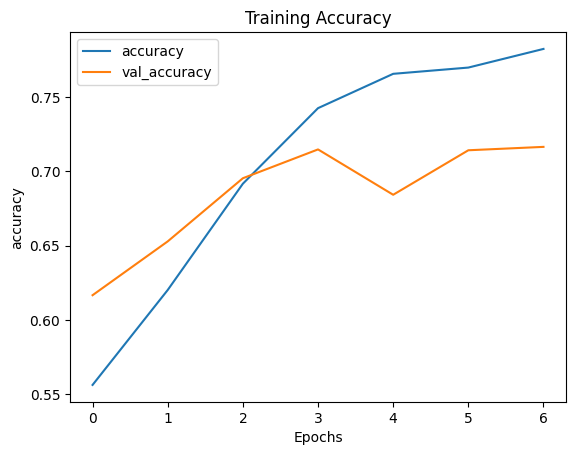

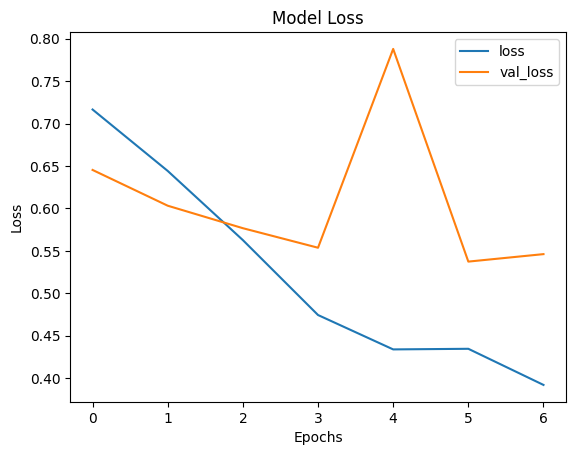

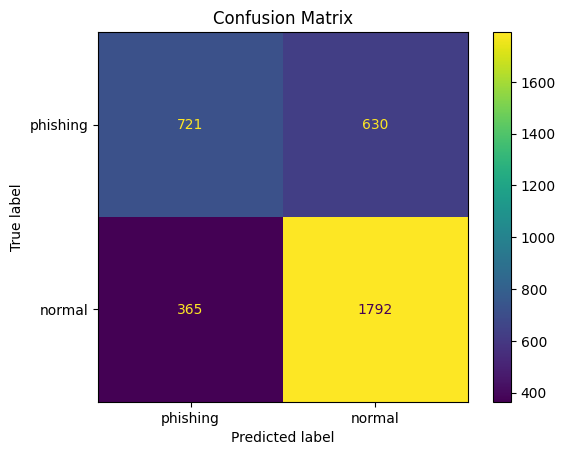

In [ ]:
model_smp = Sequential()
model_smp.add(Embedding(input_dim=len(tk.word_index)+1, output_dim=50, input_length=150))
model_smp.add(SimpleRNN(units=100))
model_smp.add(Dropout(0.45))
model_smp.add(Dense(1, activation='sigmoid'))

model_smp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_smp.summary()

historical_smp = model_smp.fit(x_train, y_train, epochs=7, batch_size=16, validation_data=(x_test, y_test))

# Plot training accuracy and loss
pd.DataFrame(historical_smp.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical_smp.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Confusion Matrix
y_pred_prob_smp = model_smp.predict(x_test)
y_pred_smp = (y_pred_prob_smp > 0.5).astype(int)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_smp = confusion_matrix(y_test, y_pred_smp)
ax_smp = ConfusionMatrixDisplay(confusion_matrix=cnf_smp, display_labels=['phishing', 'normal']).plot()
plt.title("Confusion Matrix")
plt.show()


### LSTM Model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(tk.word_index)+1, output_dim=50, input_length=150))
model.add(LSTM(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

historical = model.fit(x_train, y_train, epochs=5, batch_size=16, validation_data=(x_test, y_test))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7131 - loss: 0.5488 - val_accuracy: 0.9353 - val_loss: 0.2406
Epoch 2/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9096 - loss: 0.2669 - val_accuracy: 0.9253 - val_loss: 0.2313
Epoch 3/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9503 - loss: 0.1800 - val_accuracy: 0.9598 - val_loss: 0.1534
Epoch 4/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9652 - loss: 0.1219 - val_accuracy: 0.9524 - val_loss: 0.1432
Epoch 5/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9781 - loss: 0.0761 - val_accuracy: 0.9698 - val_loss: 0.1217


# **5. Model Performance and Evaluation**

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9712 - loss: 0.1171
Model Loss: 0.12166252732276917
Model Accuracy: 96.9783365726471
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


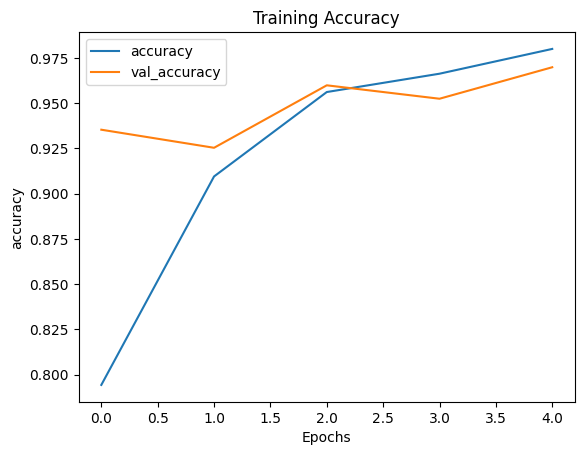

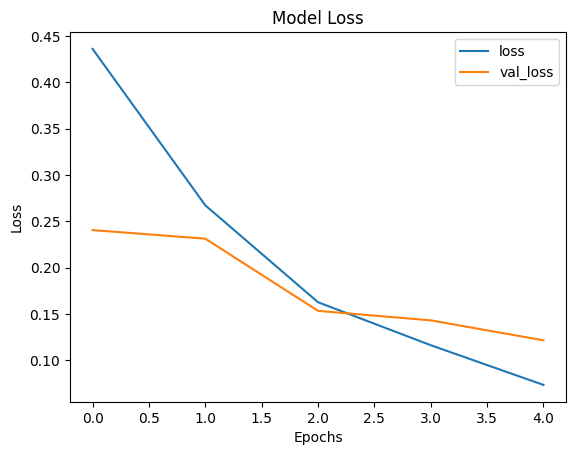

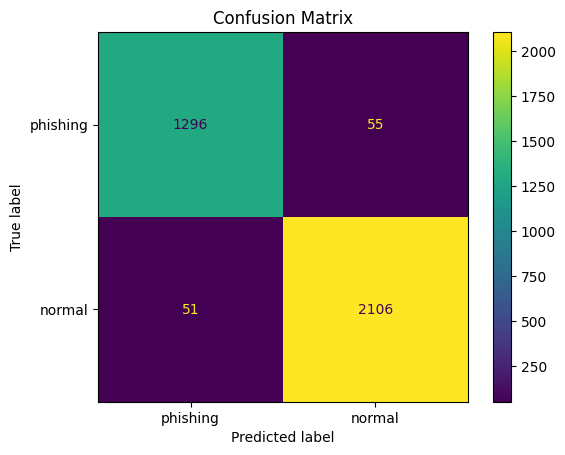

In [ ]:
results = model.evaluate(x_test, y_test)
loss = results[0]
accuracy = results[1]

print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy*100}")

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

pd.DataFrame(historical.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

cnf = confusion_matrix(y_test, y_pred)
ax = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=['phishing', 'normal'])
ax.plot()
plt.title("Confusion Matrix")
plt.show()

# Save the model
model.save("model.h5")


# **Using The Model**

### Loading the Model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import re


!gdown 1eckSpvHR3x1tMeNA2GwtvvHH-6rJovU0 -O PhishingModel.h5
!gdown 1ODD5mrqYsribBjCTexg9gEqukt6nGuM4 -O tokenizer.pickle

# Load the trained model
model = load_model('/content/PhishingModel.h5')

# Load the tokenizer
import pickle
with open('/content/tokenizer.pickle', 'rb') as handle:
    tk = pickle.load(handle)

# Define the preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

Downloading...
From (original): https://drive.google.com/uc?id=1eckSpvHR3x1tMeNA2GwtvvHH-6rJovU0
From (redirected): https://drive.google.com/uc?id=1eckSpvHR3x1tMeNA2GwtvvHH-6rJovU0&confirm=t&uuid=ee1aa457-5c03-4f69-979f-fd69b7227d5f
To: /content/PhishingModel.h5
100% 110M/110M [00:00<00:00, 175MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ODD5mrqYsribBjCTexg9gEqukt6nGuM4
To: /content/tokenizer.pickle
100% 8.44M/8.44M [00:00<00:00, 144MB/s]


### Trying The Model

In [ ]:
# Paste Your Text Here
new_email_text = """Dear Mohamed,

Thank you for joining us for the Artificial Intelligence fundamentals Closing Ceremony! We were happy to celebrate your achievements alongside all of you.

We hope you found the ceremony to be a valuable experience as you reflect on your journey and the new skills you've gained

And we'd also like to inform you that you have WON our raffle, just send you're banking info to claim your prize!

"""
# Delete the last line to see how the prediction Changes!.

# Preprocess the email text
preprocessed_text = preprocess_text(new_email_text)

# Convert the text into sequences
sequence = tk.texts_to_sequences([preprocessed_text])

# Pad the sequence
max_len = 150
padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')

# Predict the probability
prediction_prob = model.predict(padded_sequence)

# Convert probability to binary output
prediction = (prediction_prob > 0.5).astype(int)

# Display the prediction
if prediction[0][0] == 0:
    print("The email is classified as phishing.")
else:
    print("The email is classified as safe.")
print("Trust Score:", round((prediction_prob[0][0])*100,2),'%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The email is classified as phishing.
Trust Score: 10.31 %
